## IMPORTS and UTILS

In [32]:
print("hi")

import os
import pandas as pd
import subprocess
import re
import numpy as np
import json
import csv
import glob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

import os

from scripts import combat_info


CAMCAN = "./DONNES/CamCAN.md.raw.csv.gz"



MAINFOLDER = "ROBUST_EVALUATION"
SYNTHETIC_SITES = f"{MAINFOLDER}/SYNTHETIC_SITES"



RAWFOLDER = "RAW"

ANALYSISFOLDER = "ANALYSIS"

hi


In [35]:
df_unique_sid = df_combined.drop_duplicates(subset='sid')
print(df_unique_sid)

                  sid  bundle metric      mean              site   age  sex  \
0       002_S_1280_bl  mni_AC     fw -0.002465  adni_compilation  70.7    2   
1      002_S_1280_m24  mni_AC     fw -0.001226  adni_compilation  70.7    2   
2       002_S_4213_bl  mni_AC     fw -0.005296  adni_compilation  78.0    2   
3      002_S_4799_m12  mni_AC     fw -0.015337  adni_compilation  68.0    1   
4       002_S_4799_bl  mni_AC     fw -0.028047  adni_compilation  68.0    1   
...               ...     ...    ...       ...               ...   ...  ...   
26564  941_S_6052_m12  mni_AC     fw  0.004273  adni_compilation  88.1    2   
26565   941_S_6068_sc  mni_AC     fw  0.008143  adni_compilation  75.7    1   
26566  941_S_6068_m12  mni_AC     fw  0.013427  adni_compilation  75.7    1   
26567  941_S_6345_m12  mni_AC     fw  0.004353  adni_compilation  79.3    1   
26568   941_S_6345_sc  mni_AC     fw -0.012746  adni_compilation  79.3    1   

       handedness disease  
0               1      

In [36]:

df = df_combined
# Étape 1 : Créer une colonne combinée pour METRIC et BUNDLE
df['metric_bundle'] = df['metric'] + "_" + df['bundle']



                sid  ad_mni_AC   ad_mni_AF_L  ad_mni_AF_R  ad_mni_AST_L  \
0     002_S_1280_bl  -0.000047 -3.119824e-05    -0.000028 -2.205220e-05   
1    002_S_1280_m24  -0.000029  4.540797e-06     0.000003  1.756513e-05   
2     002_S_4213_bl  -0.000018  3.258187e-07     0.000004  1.613655e-05   
3     002_S_4225_bl   0.000036  4.132691e-05     0.000040  5.700211e-05   
4     002_S_4229_bl   0.000011 -1.826840e-05    -0.000002 -2.358840e-07   
..              ...        ...           ...          ...           ...   
650   941_S_6574_sc  -0.000071 -3.759453e-05    -0.000029 -2.183191e-05   
651  941_S_6575_m12  -0.000037 -3.023908e-05    -0.000033 -1.304333e-05   
652   941_S_6575_sc  -0.000010 -1.591079e-05    -0.000017 -7.333234e-06   
653   941_S_6580_sc   0.000012  2.812610e-05     0.000015  3.543029e-05   
654   941_S_6581_sc  -0.000034 -3.937871e-05    -0.000055 -4.821524e-05   

     ad_mni_AST_R     ad_mni_CC  ad_mni_CCMid  ad_mni_CC_ForcepsMajor  \
0       -0.000024 -3.66083

In [37]:
df = df_pivot
df = df.drop(columns=['sid'])
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
print(data_scaled)

[[-1.21827339 -0.81289081 -0.77015248 ...  1.08017238  0.26308444
   0.62923791]
 [-0.75003312  0.11831348  0.09056597 ...  0.94306012  0.02431017
  -0.16648228]
 [-0.45608044  0.00848942  0.10342945 ...  0.81858834  0.90106043
   1.20173159]
 ...
 [-0.26514796 -0.41456627 -0.4573921  ... -0.40590745 -0.17368416
  -0.63334338]
 [ 0.31425269  0.73284425  0.41825234 ... -0.00856755  0.57339777
   1.01592576]
 [-0.88637566 -1.02603839 -1.4942469  ... -0.97959812 -0.6052926
  -0.70788118]]


In [38]:
# Cell 3: KMeans Clustering without Dimensionality Reduction
kmeans = KMeans(n_clusters=2, random_state=42)  # Adjust n_clusters as needed
clusters_no_reduction = kmeans.fit_predict(data_scaled)
silhouette_no_reduction = silhouette_score(data_scaled, clusters_no_reduction)

print(f"Silhouette Score without Dimensionality Reduction: {silhouette_no_reduction:.2f}")

Silhouette Score without Dimensionality Reduction: 0.25


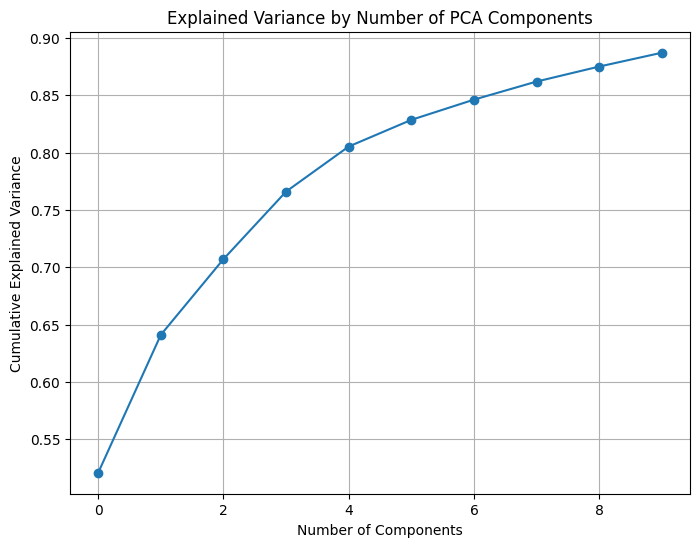

In [39]:
# Cell 4: PCA for Dimensionality Reduction
pca = PCA(n_components=10)  # Reduce to 10 dimensions; adjust as needed
data_pca = pca.fit_transform(data_scaled)


# Visualize Explained Variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Explained Variance by Number of PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

Silhouette Score with Dimensionality Reduction: 0.28


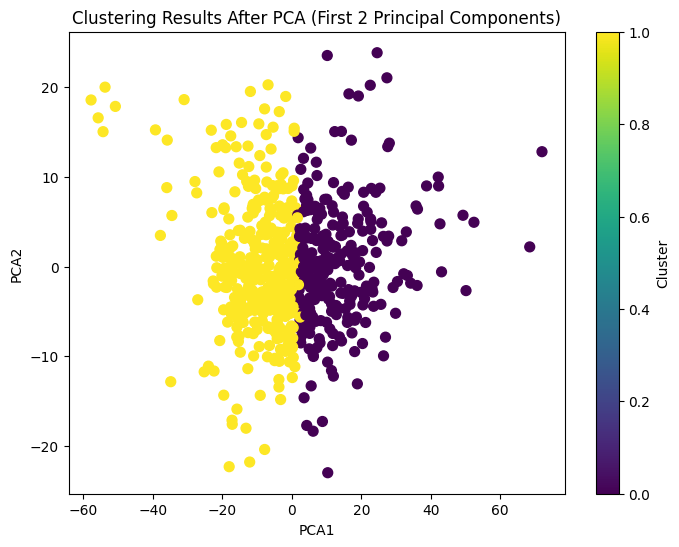

In [40]:
# Cell 5: KMeans Clustering with Dimensionality Reduction
kmeans_pca = KMeans(n_clusters=2, random_state=42)
clusters_with_reduction = kmeans_pca.fit_predict(data_pca)
silhouette_with_reduction = silhouette_score(data_pca, clusters_with_reduction)

print(f"Silhouette Score with Dimensionality Reduction: {silhouette_with_reduction:.2f}")

# Visualize Clustering Results After PCA
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_with_reduction, cmap='viridis', s=50)
plt.title("Clustering Results After PCA (First 2 Principal Components)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Cluster")
plt.show()

In [41]:

# Ajouter les clusters obtenus sans réduction de dimensionnalité à df_combined
df_unique_sid['cluster_no_reduction'] = clusters_no_reduction

# Ajouter les clusters obtenus avec réduction de dimensionnalité à df_combined
df_unique_sid['cluster_with_reduction'] = clusters_with_reduction

# Créer une colonne pour les clusters basés sur la colonne 'disease'
df_unique_sid['disease_cluster'] = df_unique_sid['disease'].apply(lambda x: 0 if x == 'HC' else 1)

# Comparer les clusters obtenus avec les clusters basés sur 'disease'
correct_no_reduction = (df_unique_sid['cluster_no_reduction'] == df_unique_sid['disease_cluster']).sum()
correct_with_reduction = (df_unique_sid['cluster_with_reduction'] == df_unique_sid['disease_cluster']).sum()

# Calculer les pourcentages de correspondance
total_samples = len(df_unique_sid)
accuracy_no_reduction = correct_no_reduction / total_samples * 100
accuracy_with_reduction = correct_with_reduction / total_samples * 100

print(f"Accuracy without Dimensionality Reduction: {accuracy_no_reduction:.2f}%")
print(f"Accuracy with Dimensionality Reduction: {accuracy_with_reduction:.2f}%")

Accuracy without Dimensionality Reduction: 57.25%
Accuracy with Dimensionality Reduction: 57.25%


/tmp/ipykernel_64808/1472455350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_sid['cluster_no_reduction'] = clusters_no_reduction
/tmp/ipykernel_64808/1472455350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_sid['cluster_with_reduction'] = clusters_with_reduction
/tmp/ipykernel_64808/1472455350.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [42]:
# Cell 6: DBSCAN without Dimensionality Reduction
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Adjust `eps` and `min_samples` as needed
dbscan_clusters_no_reduction = dbscan.fit_predict(data_scaled)

# Count clusters excluding noise labeled as -1
n_clusters_dbscan_no_reduction = len(set(dbscan_clusters_no_reduction)) - (1 if -1 in dbscan_clusters_no_reduction else 0)
print(f"DBSCAN detected {n_clusters_dbscan_no_reduction} clusters without dimensionality reduction.")


DBSCAN detected 0 clusters without dimensionality reduction.


DBSCAN detected 0 clusters with dimensionality reduction.


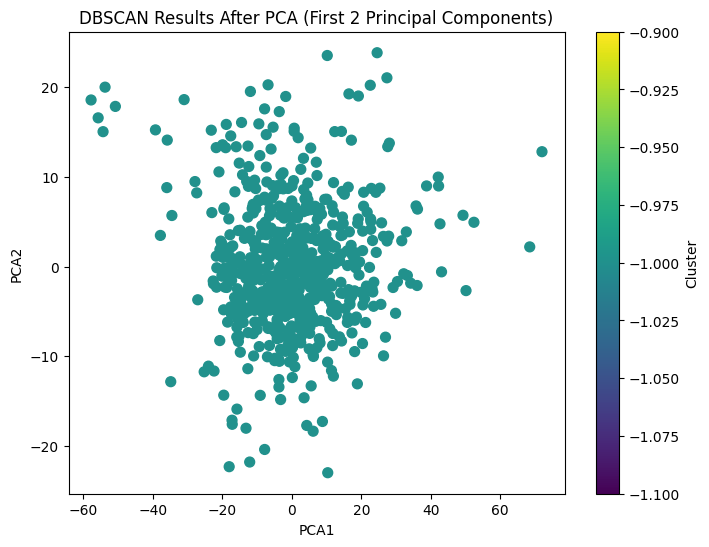

In [43]:
# Cell 7: DBSCAN with Dimensionality Reduction
dbscan_clusters_with_reduction = dbscan.fit_predict(data_pca)

# Count clusters excluding noise labeled as -1
n_clusters_dbscan_with_reduction = len(set(dbscan_clusters_with_reduction)) - (1 if -1 in dbscan_clusters_with_reduction else 0)
print(f"DBSCAN detected {n_clusters_dbscan_with_reduction} clusters with dimensionality reduction.")

# Visualize DBSCAN Results After PCA
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_clusters_with_reduction, cmap='viridis', s=50)
plt.title("DBSCAN Results After PCA (First 2 Principal Components)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Cluster")
plt.show()

In [44]:
# Cell 3: Gaussian Mixture Model without Dimensionality Reduction
gmm = GaussianMixture(n_components=2, random_state=42)  # Adjust n_components as needed
clusters_no_reduction = gmm.fit_predict(data_scaled)
silhouette_no_reduction = silhouette_score(data_scaled, clusters_no_reduction)
print(f"Silhouette Score without Dimensionality Reduction: {silhouette_no_reduction:.2f}")


Silhouette Score without Dimensionality Reduction: 0.25


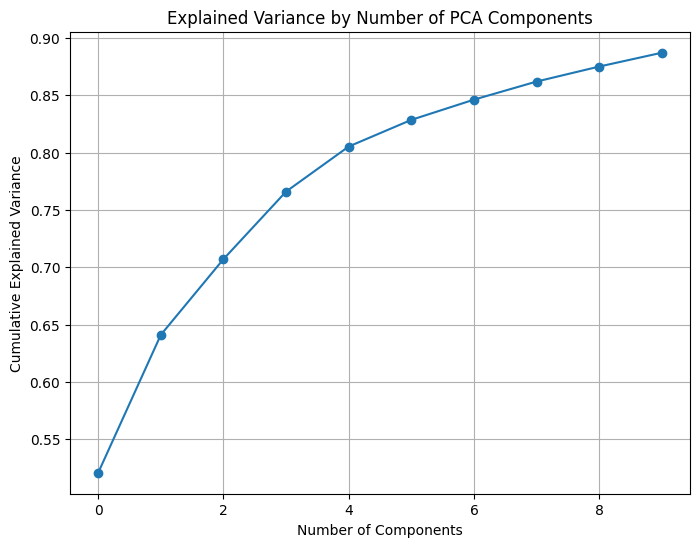

In [45]:
# Cell 4: PCA for Dimensionality Reduction
pca = PCA(n_components=10)  # Reduce to 10 dimensions; adjust as needed
data_pca = pca.fit_transform(data_scaled)

# Visualize Explained Variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Explained Variance by Number of PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

Silhouette Score with Dimensionality Reduction: 0.24


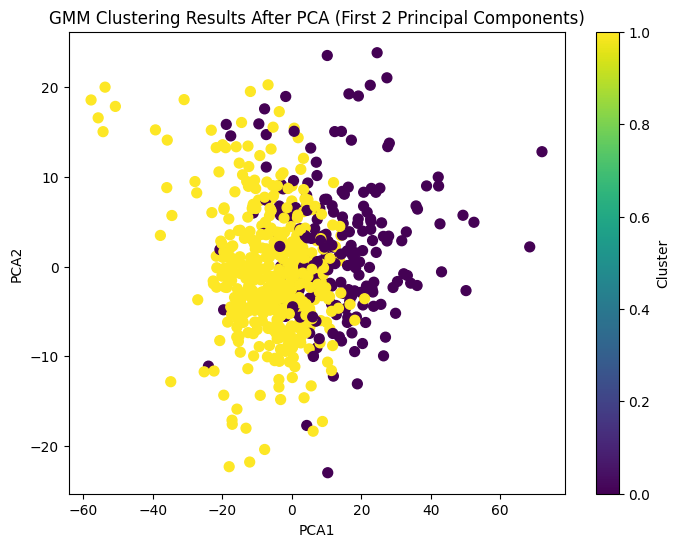

In [46]:
# Cell 5: Gaussian Mixture Model with Dimensionality Reduction
gmm_pca = GaussianMixture(n_components=2, random_state=42)
clusters_with_reduction = gmm_pca.fit_predict(data_pca)
silhouette_with_reduction = silhouette_score(data_pca, clusters_with_reduction)

print(f"Silhouette Score with Dimensionality Reduction: {silhouette_with_reduction:.2f}")

# Visualize Clustering Results After PCA
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_with_reduction, cmap='viridis', s=50)
plt.title("GMM Clustering Results After PCA (First 2 Principal Components)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Cluster")
plt.show()

In [47]:
# Cell 6: Compare Clustering Results
# Count number of points in each cluster
unique_no_reduction, counts_no_reduction = np.unique(clusters_no_reduction, return_counts=True)
unique_with_reduction, counts_with_reduction = np.unique(clusters_with_reduction, return_counts=True)

print("Cluster distribution without dimensionality reduction:")
for cluster, count in zip(unique_no_reduction, counts_no_reduction):
    print(f"Cluster {cluster}: {count} points")

print("\nCluster distribution with dimensionality reduction:")
for cluster, count in zip(unique_with_reduction, counts_with_reduction):
    print(f"Cluster {cluster}: {count} points")

Cluster distribution without dimensionality reduction:
Cluster 0: 268 points
Cluster 1: 387 points

Cluster distribution with dimensionality reduction:
Cluster 0: 196 points
Cluster 1: 459 points


In [48]:

# Ajouter les clusters obtenus sans réduction de dimensionnalité à df_combined
df_unique_sid['cluster_no_reduction'] = clusters_no_reduction

# Ajouter les clusters obtenus avec réduction de dimensionnalité à df_combined
df_unique_sid['cluster_with_reduction'] = clusters_with_reduction

# Créer une colonne pour les clusters basés sur la colonne 'disease'
df_unique_sid['disease_cluster'] = df_unique_sid['disease'].apply(lambda x: 0 if x == 'HC' else 1)

# Comparer les clusters obtenus avec les clusters basés sur 'disease'
correct_no_reduction = (df_unique_sid['cluster_no_reduction'] == df_unique_sid['disease_cluster']).sum()
correct_with_reduction = (df_unique_sid['cluster_with_reduction'] == df_unique_sid['disease_cluster']).sum()

# Calculer les pourcentages de correspondance
total_samples = len(df_unique_sid)
accuracy_no_reduction = correct_no_reduction / total_samples * 100
accuracy_with_reduction = correct_with_reduction / total_samples * 100

print(f"Accuracy without Dimensionality Reduction: {accuracy_no_reduction:.2f}%")
print(f"Accuracy with Dimensionality Reduction: {accuracy_with_reduction:.2f}%")

Accuracy without Dimensionality Reduction: 57.25%
Accuracy with Dimensionality Reduction: 54.81%


/tmp/ipykernel_90533/1472455350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_sid['cluster_no_reduction'] = clusters_no_reduction
/tmp/ipykernel_90533/1472455350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_sid['cluster_with_reduction'] = clusters_with_reduction
/tmp/ipykernel_90533/1472455350.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [49]:
# Cell 3: Spectral Clustering without Dimensionality Reduction
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42, n_neighbors=10)  # Adjust parameters
clusters_no_reduction = spectral.fit_predict(data_scaled)
silhouette_no_reduction = silhouette_score(data_scaled, clusters_no_reduction)

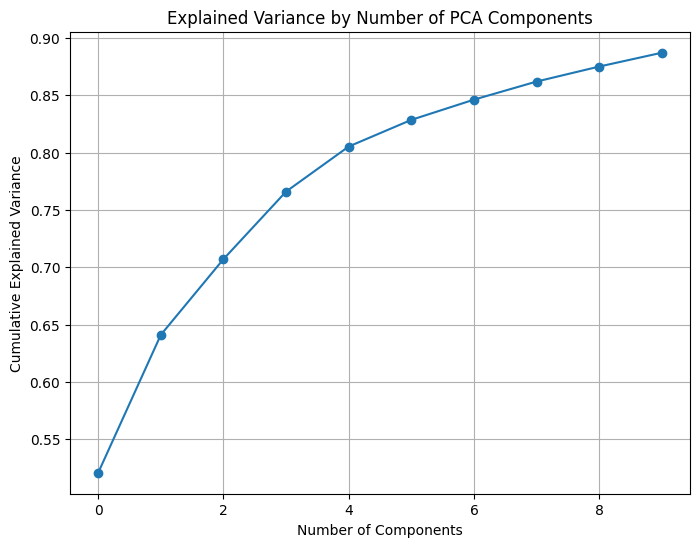

In [50]:
# Cell 4: PCA for Dimensionality Reduction
pca = PCA(n_components=10)  # Reduce to 10 dimensions; adjust as needed
data_pca = pca.fit_transform(data_scaled)

# Visualize Explained Variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Explained Variance by Number of PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [51]:
# Cell 5: Spectral Clustering with Dimensionality Reduction
spectral_pca = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42, n_neighbors=10)
clusters_with_reduction = spectral_pca.fit_predict(data_pca)
silhouette_with_reduction = silhouette_score(data_pca, clusters_with_reduction)

print(f"Silhouette Score with Dimensionality Reduction: {silhouette_with_reduction:.2f}")

Silhouette Score with Dimensionality Reduction: 0.23


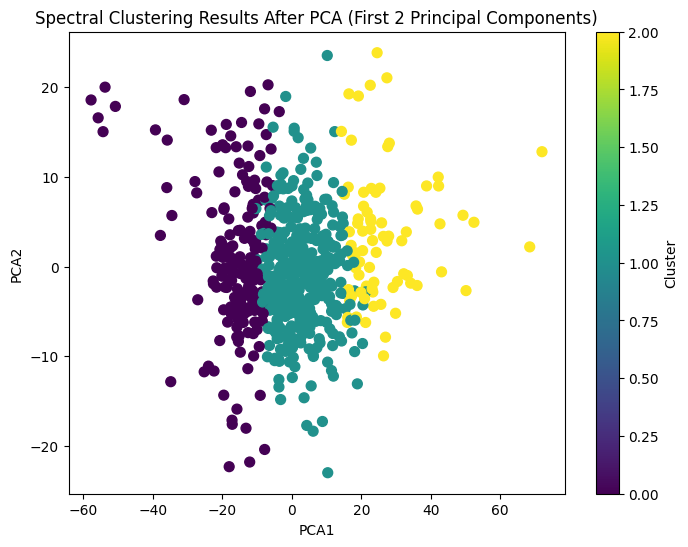

In [52]:
# Cell 6: Visualize Clustering Results After PCA
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_with_reduction, cmap='viridis', s=50)
plt.title("Spectral Clustering Results After PCA (First 2 Principal Components)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Cluster")
plt.show()

In [53]:
# Cell 7: Compare Clustering Results
# Count number of points in each cluster
unique_no_reduction, counts_no_reduction = np.unique(clusters_no_reduction, return_counts=True)
unique_with_reduction, counts_with_reduction = np.unique(clusters_with_reduction, return_counts=True)

print("Cluster distribution without dimensionality reduction:")
for cluster, count in zip(unique_no_reduction, counts_no_reduction):
    print(f"Cluster {cluster}: {count} points")

print("\nCluster distribution with dimensionality reduction:")
for cluster, count in zip(unique_with_reduction, counts_with_reduction):
    print(f"Cluster {cluster}: {count} points")

Cluster distribution without dimensionality reduction:
Cluster 0: 191 points
Cluster 1: 82 points
Cluster 2: 382 points

Cluster distribution with dimensionality reduction:
Cluster 0: 188 points
Cluster 1: 390 points
Cluster 2: 77 points


In [54]:

# Ajouter les clusters obtenus sans réduction de dimensionnalité à df_combined
df_unique_sid['cluster_no_reduction'] = clusters_no_reduction

# Ajouter les clusters obtenus avec réduction de dimensionnalité à df_combined
df_unique_sid['cluster_with_reduction'] = clusters_with_reduction

# Créer une colonne pour les clusters basés sur la colonne 'disease'
df_unique_sid['disease_cluster'] = df_unique_sid['disease'].apply(lambda x: 0 if x == 'HC' else 1)

# Comparer les clusters obtenus avec les clusters basés sur 'disease'
correct_no_reduction = (df_unique_sid['cluster_no_reduction'] == df_unique_sid['disease_cluster']).sum()
correct_with_reduction = (df_unique_sid['cluster_with_reduction'] == df_unique_sid['disease_cluster']).sum()

# Calculer les pourcentages de correspondance
total_samples = len(df_unique_sid)
accuracy_no_reduction = correct_no_reduction / total_samples * 100
accuracy_with_reduction = correct_with_reduction / total_samples * 100

print(f"Accuracy without Dimensionality Reduction: {accuracy_no_reduction:.2f}%")
print(f"Accuracy with Dimensionality Reduction: {accuracy_with_reduction:.2f}%")

Accuracy without Dimensionality Reduction: 43.36%
Accuracy with Dimensionality Reduction: 58.02%


/tmp/ipykernel_90533/1472455350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_sid['cluster_no_reduction'] = clusters_no_reduction
/tmp/ipykernel_90533/1472455350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_sid['cluster_with_reduction'] = clusters_with_reduction
/tmp/ipykernel_90533/1472455350.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume